In [1]:
# needed imports
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

%matplotlib inline


In [2]:
# load dataset
df = pd.read_csv("project/resources/Hotels_data_Changed.csv")
# validates that there are no null values in the dataset
if df.isnull().values.any():
    print("NOTICED: there are some values that are 'NaN' in the dataset")


In [3]:
num_hotels = 151

# מצא את 150 בתי המלון המכילים הכי הרבה רשומות בקובץ המקורי. ניקח רק נתונים של מלונות אלה
print("Number of rows before formatting the data:", len(df))
idx = df.groupby("Hotel Name", sort=False)["Hotel Name"].count().nlargest(num_hotels)

hotel_names = list(idx.keys())
df = df[df["Hotel Name"].isin(hotel_names)]
print("Number of rows after GroupBy the data to take maximum discount price:", len(df))


Number of rows before formatting the data: 187848
Number of rows after GroupBy the data to take maximum discount price: 169515


In [4]:
num_dates = 40

# מצא את 40 תאריכי ה Checkin המכילים הכי הרבה רשומות. ניקח רק את הנתונים של תאריכים אלה.

print("Number of rows before formatting the data:", len(df))
idx = df.groupby("Checkin Date", sort=False)["Checkin Date"].count().nlargest(num_dates)
most_dates = list(idx.keys())
df = df[df["Checkin Date"].isin(most_dates)]
print("Number of rows after GroupBy the data to take maximum discount price:", len(df))


Number of rows before formatting the data: 169515
Number of rows after GroupBy the data to take maximum discount price: 60455


In [5]:
df1 = df[['Hotel Name', 'Checkin Date', 'Discount Code', 'Discount Price']]


In [6]:
# עבור כל תאריך Checkin, ניקח את 4 המחירים עבור 4 קודי ההנחות.
# סה"כ נקבל לכל בית מלון 160 מספרים (40 תאריכים * 4 מחירים).
# שימו לב שייתכן כי בתאריכים מסוימים לא יימצאו נתונים עבור בית המלון הספציפי – במקרה זה נסמן מחיר של -1.
# שימו לב כי כל לתאריך Checkin יש יותר מ snapshot אחד,

# עבור כל תאריך Checkin לבית מלון מסוים ניקח את זה בעל המחיר (לאחר הנחה) המינימאלי
# מבין כל ה snapshot-ים של מלון זה לאותו תאריך Checkin

df_min_price = df1.loc[df1.groupby(['Hotel Name', 'Checkin Date', 'Discount Code'])['Discount Price'].idxmin()]

table = df_min_price.pivot_table(values='Discount Price', index=['Hotel Name'],
                                 columns=['Checkin Date', 'Discount Code'])


In [7]:
# את המחירים יש לנרמל בין 0 ל 100 – כך ש 0 זה המחיר הנמוך ביותר שמצאנו מתוך 160 המחירים (כמובן לא כולל -1)
# 100 הוא המחיר הגבוה ביותר שמצאנו עבור בית המלון הספציפי

na_key = -1

new_df = table.apply(lambda x: ((x - x.min()) * 100) / (x.max() - x.min()), axis=1).fillna(na_key).astype(int)


In [8]:
# קיבלנו קובץ שבו כל שורה מייצגת בית מלון אחד, ויש בה 161 עמודות – אחת לשם המלון ו 160 עבור המחירים המנורמלים
new_csv = "project/resources/hotels_clustering_data.csv"
# dump to new file
new_df.to_csv(new_csv, index=True, index_label=False)


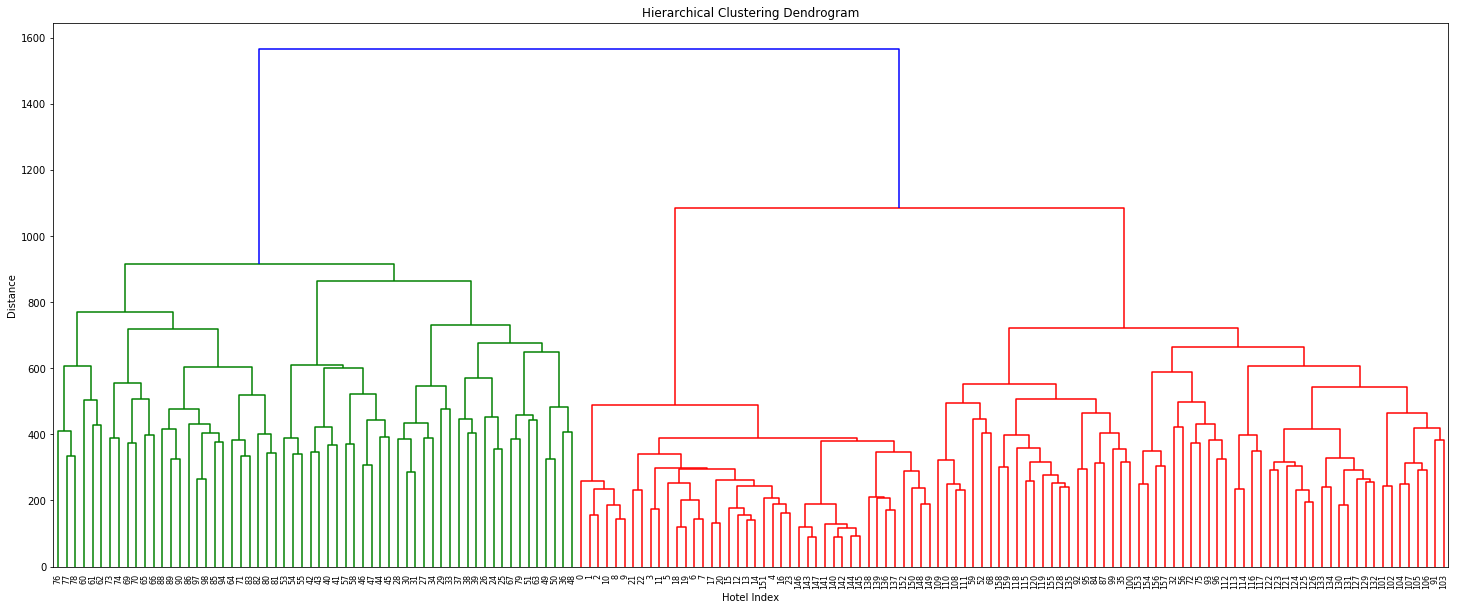

In [14]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Hotel Index')
plt.ylabel('Distance')
# generate the linkage matrix
Z = linkage(new_df.T.values, 'ward')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
